# Revisar este documento.

http://docs.pymc-learn.org/en/latest/_modules/pmlearn/neural_network/multilayer_perceptron.html#MLPClassifier

In [1]:
%matplotlib inline   
from warnings import filterwarnings
filterwarnings("ignore")
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'    
    
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(12345)
rc = {'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20, 'font.size': 20, 
      'legend.fontsize': 12.0, 'axes.titlesize': 10, "figure.figsize": [12, 6]}
sns.set(rc = rc)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display
import ipyparallel as ipp
from ipyparallel.error import TimeoutError

rc = ipp.Client()
view = rc[:]
view.block = True

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
import pmlearn
from pmlearn.neural_network import MLPClassifier
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


Running on pymc-learn v0.0.1.rc3


In [3]:
yaux_train=pd.read_csv('yaux_train.csv',header=None)
yaux_test=pd.read_csv('yaux_test.csv',header=None)
aux_train=pd.read_csv('aux_train.csv') 
aux_test=pd.read_csv('aux_test.csv')
aux_train.drop('Unnamed: 0',inplace=True,axis=1)
aux_test.drop('Unnamed: 0',inplace=True,axis=1)
aux_train=np.array(aux_train)
aux_test=np.array(aux_test)
yaux_train=np.array(yaux_train[1])
yaux_test=np.array(yaux_test[1])

In [30]:
yaux_train=yaux_train.astype(floatX)

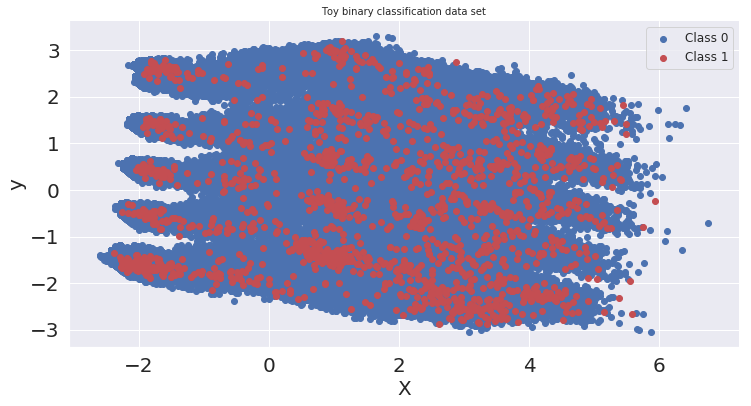

In [31]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
import theano
floatX = theano.config.floatX

X, y = aux_train,yaux_train
#X = scale(X)
#X = X.astype(floatX)
#y = y.astype(floatX)

## Plot the data 
fig, ax = plt.subplots()
ax.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
ax.scatter(X[y==1, 0], X[y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='y', title='Toy binary classification data set');

In [28]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X[:, 0]#, X[y==0., 1])
y

array([ 1.65033555,  3.82827876,  1.95754467, ..., -1.15171513,
       -1.8272088 , -1.93825944])

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [32]:
model=  MLPClassifier()

In [34]:
%px
model.fit(X, y)

Average Loss = 8,182: 100%|██████████| 200000/200000 [4:21:02<00:00, 17.56it/s]       
Finished [100%]: Average Loss = 8,182


MLPClassifier(n_hidden=5)

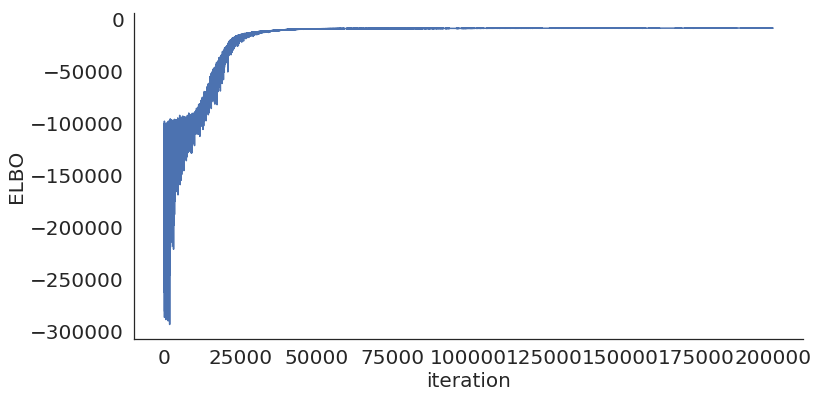

In [35]:
model.plot_elbo()

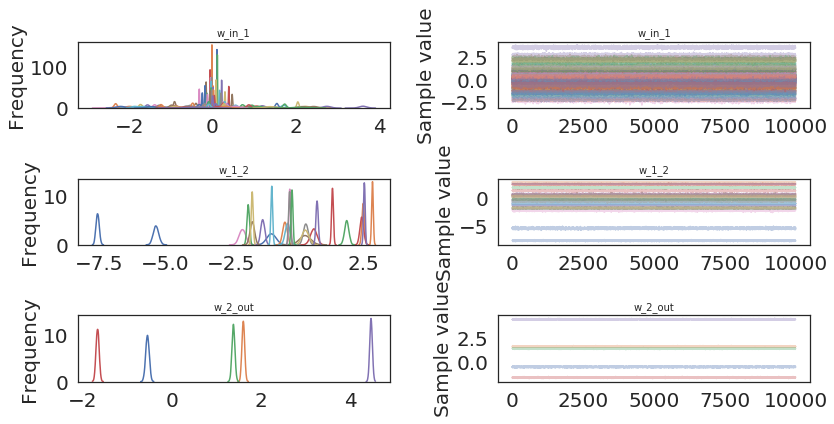

In [36]:
pm.traceplot(model.trace);

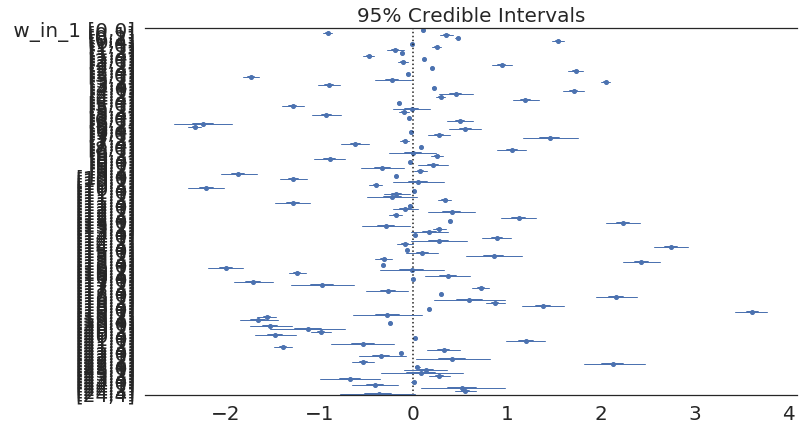

In [37]:
pm.forestplot(model.trace, varnames=["w_in_1"]);

In [38]:
pm.summary(model.trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
w_in_1__0_0,0.107025,0.002718,0.000025,0.101746,0.112349
w_in_1__0_1,-0.912099,0.024531,0.000242,-0.959524,-0.863897
w_in_1__0_2,0.353536,0.036448,0.000346,0.281389,0.424245
w_in_1__0_3,0.472578,0.011706,0.000105,0.449925,0.495773
w_in_1__0_4,1.546150,0.034957,0.000381,1.476206,1.613097
w_in_1__1_0,-0.013143,0.002584,0.000023,-0.018260,-0.008099
w_in_1__1_1,0.248768,0.024558,0.000223,0.201632,0.296417
w_in_1__1_2,-0.194747,0.045401,0.000446,-0.280806,-0.103000
w_in_1__1_3,-0.121944,0.011634,0.000112,-0.144837,-0.099324
w_in_1__1_4,-0.476723,0.032063,0.000316,-0.540048,-0.414589


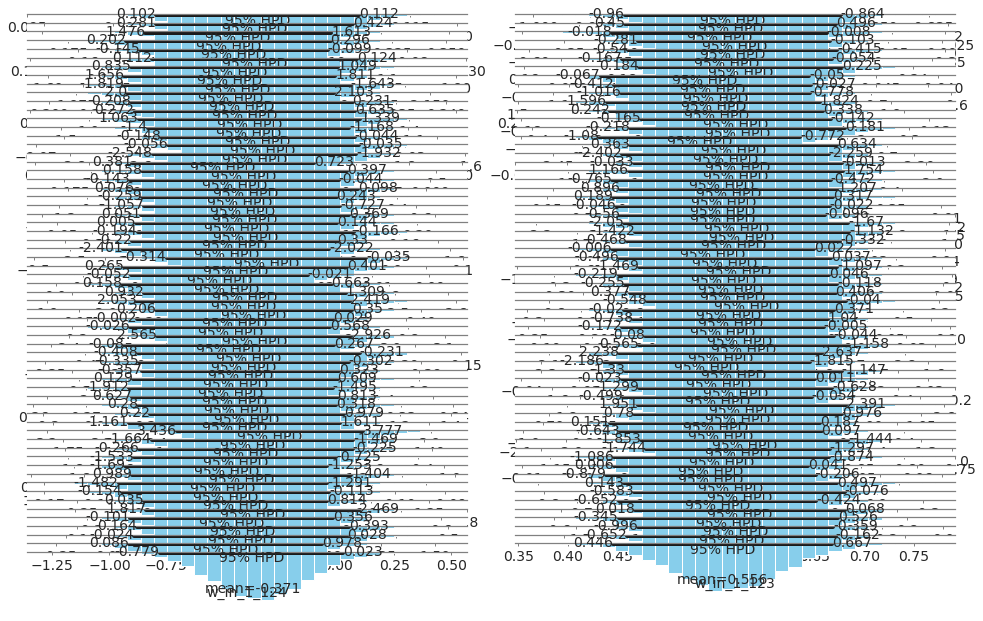

In [39]:
pm.plot_posterior(model.trace, varnames=["w_in_1"], 
                 figsize = [14, 8]);

In [40]:
y_pred = model.predict(aux_test)

100%|██████████| 2000/2000 [01:08<00:00, 29.34it/s]


In [48]:
#yaux_test=yaux_test[1:,].astype(floatX)
model.score(aux_test,yaux_test)

100%|██████████| 2000/2000 [01:07<00:00, 29.42it/s]


0.9884874950377134

In [50]:
1-np.mean(yaux_test)

0.9883173594963988

In [54]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
proba=model.predict_proba(aux_test)

100%|██████████| 2000/2000 [01:42<00:00, 19.42it/s]


In [57]:
#print(classification_report(y_test,pred))
#print(confusion_matrix(y_test,pred))
np.mean(proba)

0.012378551579424944

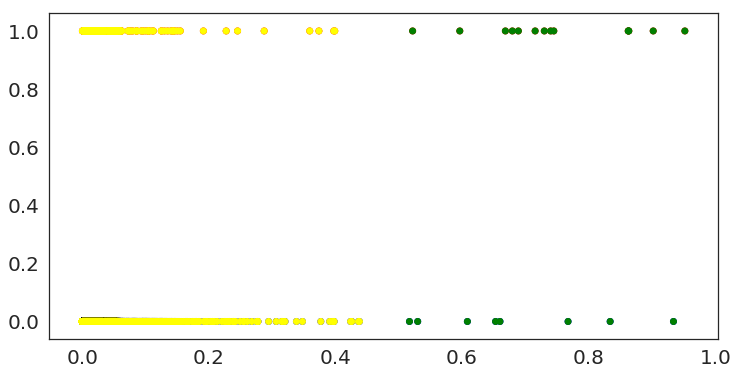

In [58]:
%px
plt.scatter(proba,yaux_test,color=['red' if i==1 else 'blue' for i in yaux_test])
%px
plt.scatter(proba,yaux_test,color=['green' if i>=0.5 else 'yellow' for i in proba])
#plt.plot(pf,'p',color='red')

In [68]:
pred=[1 if i>=0.015 else 0 for i in proba]
print(classification_report(yaux_test,pred))
print(confusion_matrix(yaux_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     34854
         1.0       0.03      0.72      0.07       412

   micro avg       0.76      0.76      0.76     35266
   macro avg       0.51      0.74      0.46     35266
weighted avg       0.98      0.76      0.85     35266

[[26470  8384]
 [  115   297]]


(0.0, 1.0)

(0.0, 1.05)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic example')

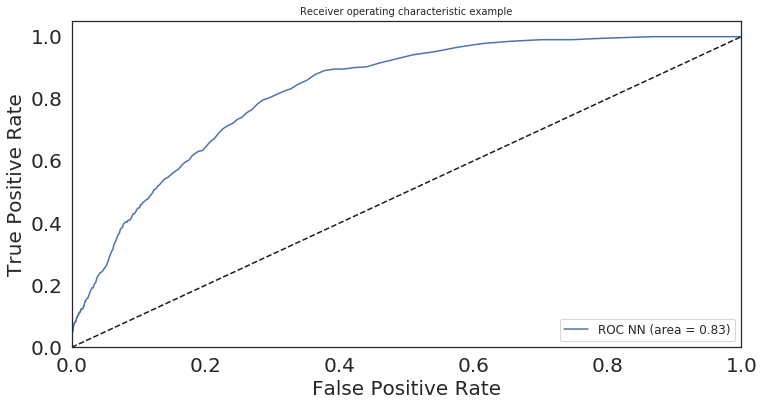

In [69]:
from sklearn.metrics import roc_auc_score, auc,precision_recall_curve
#from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
fprk, tprk, thresholds=roc_curve(yaux_test,proba)
nn_auc=auc(fprk,tprk)
from sklearn.metrics import roc_curve, auc
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fprk, tprk, label='ROC NN (area = %0.2f)' % nn_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()